# Big Mart Sales Prediction

### Consider the supermart wants us to predict the sales using data of several stores

## Importing the Dependencies

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
# Loading Dataset
df=pd.read_csv('Bigmartdata.csv')

In [4]:
# Display first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# shape of the datset
df.shape

(8523, 12)

#### There are 5681 rows and 12 columns in the dataset

In [6]:
# Information about datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Categorical features are
  Item_Identifier,  
  Item_Fat_Content,      
  Item_Type,          
  Outlet_Identifier,        
  Outlet_Size ,       
  Outlet_Location_Type,          
  Outlet_Type

In [7]:
# Check the missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Item_Weight has 1463 missing values 
##### Outlet_Size has 2410 missing values

#### Replace the float type missing values with mean and object type missing values with mode

In [8]:
df['Item_Weight'].mean()

12.857645184136183

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [10]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [11]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [12]:
## Checking for missing  values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### There are no missing values now

## Data Analysis

In [13]:
# Statistical measure
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data visualization

In [14]:
# for numerical fetures

In [15]:
sns.set()

<AxesSubplot:xlabel='Item_Weight'>

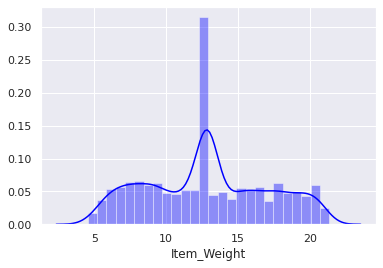

In [16]:
## Item_Weight distribution
sns.distplot(df['Item_Weight'], color='blue')

#### Mean weight is 12.85 and maximum item has weight around 12.80 

<AxesSubplot:xlabel='Item_Visibility'>

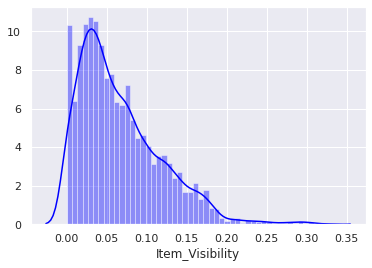

In [17]:
## Item_Visibility distribution
sns.distplot(df['Item_Visibility'], color='blue')

#### Item_visibility is positively skewed 

<AxesSubplot:xlabel='Item_MRP'>

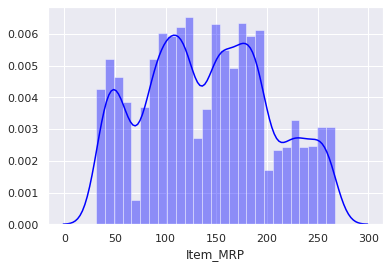

In [18]:
## Item_MRP distribution
sns.distplot(df['Item_MRP'], color='blue')

#### Most items has MRP 50, 100 and between 150-200 

<AxesSubplot:xlabel='Item_Outlet_Sales'>

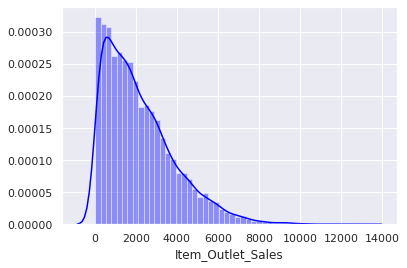

In [19]:
## Item_Outlet_Sales distribution
sns.distplot(df['Item_Outlet_Sales'], color='blue')

#### Item_Outlet_Sales is positively skewed most items has sales price less than 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

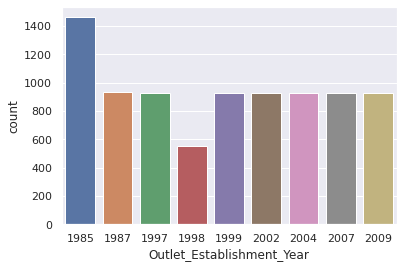

In [20]:
## Outlet_Establishment_Year distribution
sns.countplot('Outlet_Establishment_Year', data=df)

#### Most numbers of outlets established in 1985 and less number of outlets established in 1998 for other years same number of outlets established. 

### Visualization of categorical features

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

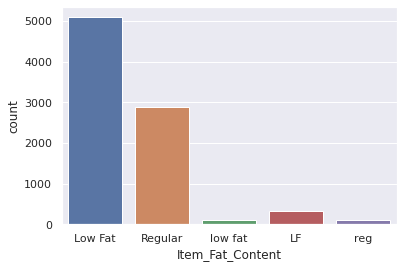

In [21]:
## Item_Fat_Content
sns.countplot('Item_Fat_Content', data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

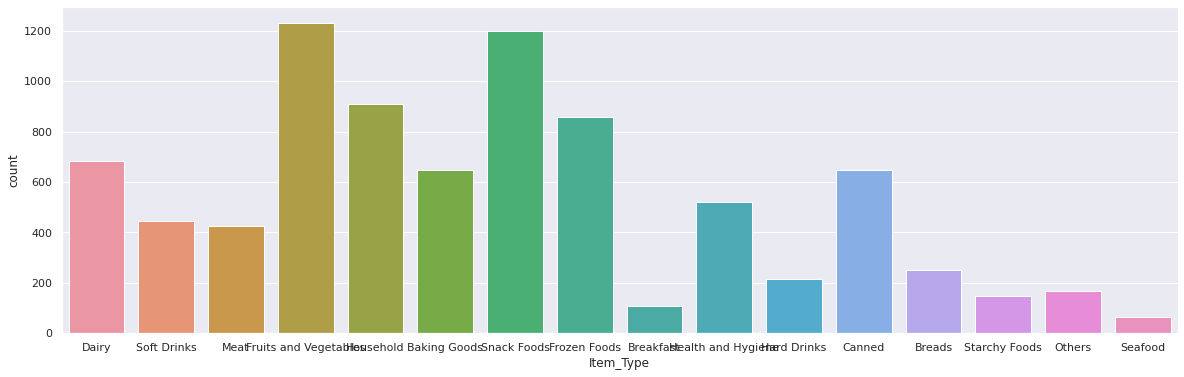

In [22]:
# Item_Type
plt.figure(figsize=(20, 6))
sns.countplot('Item_Type', data=df)

#### Different types of items are there most number of items are fruits and vegetables , snaks and foods and less numbers are seafood

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

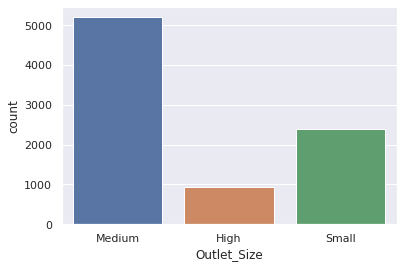

In [23]:
# Outlet_Size
sns.countplot('Outlet_Size', data=df)

#### Three numbers of outlet size are there most number of outlets size are median

## Data Preprocessing

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
## LF , low fat and Low Fat are same type and Regular and reg is same type
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Label Encoder

In [28]:
encoder=LabelEncoder()

In [29]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
df.shape

(8523, 12)

## Separating Independent features and target values

In [32]:
X=df.drop('Item_Outlet_Sales', axis=1)

In [33]:
y=df['Item_Outlet_Sales']

In [34]:
print(X)
print(y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

## Train_test_split

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Training  the ML  model

In [37]:
model=XGBRegressor()

In [38]:
## fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [39]:
## Train data prediction
y_train_predict=model.predict(X_train)

In [40]:
r2_score=metrics.r2_score(y_train,y_train_predict) 

In [41]:
r2_score

0.8677027870769456

In [42]:
## Test data prediction
y_test_predict=model.predict(X_test)

In [43]:
r2_score_test=metrics.r2_score(y_test, y_test_predict)

In [44]:
r2_score_test

0.5084079247005995